# 02 Temporal feature extraction
author: SheltonXiao (Tong Xiao)    
2023/3/2

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import trange
from IPython.display import clear_output
import matplotlib.pyplot as plt

## Well production

### Load data: Well information and time series

well infomation

In [2]:
well_info = pd.read_csv(os.path.join(r"data/processed","well_injection_info.csv"),index_col = 0,parse_dates=False)

In [3]:
well_info.tail()

,Operator Name,County Name,Field Name,Lease Name,Well #,Area Name,Area Code,District #,Section,Township,Range,Base Meridian,Latitude,Longitude
API #,,,,,,,,,,,,,,
27300035,Mobil Oil Corporation,San Diego Offshore,Any Field,NaN,S.C. 1 C,Any Area,0,1,24,10S,07W,SB,33.292263,-117.568644
27320001,"SWEPI, LP",San Diego Offshore,Any Field,Point Loma Core Hole,1,Any Area,0,1,28,17S,04W,SB,32.659824,-117.302973
27320002,"SWEPI, LP",San Diego Offshore,Any Field,Oceanside Core Hole,1,Any Area,0,1,31,11S,05W,SB,33.184411,-117.436527
27320003,"SWEPI, LP",San Diego Offshore,Any Field,Encinitas Core Hole,1,Any Area,0,1,12,13S,05W,SB,0.000000,0.000000
27320004,"SWEPI, LP",San Diego Offshore,Any Field,La Jolla Core Hole,1,Any Area,0,1,24,15S,05W,SB,0.000000,0.000000


injection data

In [4]:
injection = pd.read_csv(os.path.join(r"data/processed","well_injection_data_nonzero.csv"),parse_dates=["Reported Date"])

C:\Users\Intel\AppData\Local\Temp\ipykernel_18564\3406319341.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  injection = pd.read_csv(os.path.join(r"data/processed","well_injection_data_nonzero.csv"),parse_dates=["Reported Date"])


In [5]:
injection.head()

,API Number,Injection Date,Water or Steam Injected (bbl),Days Well Injected,Surface Injection Pressure,Source of Water,Kind of Water,PWT Status,Well Type,Status,Pool Code,Reported Date,Year,Month,Gas or Air Injected (Mcf)
0,3700025,Sep-1991,470.0,2.0,100.0,0.0,0.0,P,WD,5.0,7.0,1991-09-01,1991,Sep,NaN
1,3700025,Aug-1991,8464.0,31.0,100.0,0.0,0.0,P,WD,0.0,7.0,1991-08-01,1991,Aug,NaN
2,3700025,Jul-1991,8345.0,31.0,121.0,0.0,0.0,P,WD,0.0,7.0,1991-07-01,1991,Jul,NaN
3,3700025,Jun-1991,8429.0,30.0,144.0,0.0,0.0,P,WD,0.0,7.0,1991-06-01,1991,Jun,NaN
4,3700025,May-1991,10202.0,31.0,814.0,0.0,0.0,P,WD,0.0,7.0,1991-05-01,1991,May,NaN


In [7]:
injection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695495 entries, 0 to 695494
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   API Number                     695495 non-null  int64         
 1   Injection Date                 695495 non-null  object        
 2   Water or Steam Injected (bbl)  680952 non-null  float64       
 3   Days Well Injected             695495 non-null  float64       
 4   Surface Injection Pressure     680897 non-null  float64       
 5   Source of Water                691540 non-null  object        
 6   Kind of Water                  686096 non-null  object        
 7   PWT Status                     695495 non-null  object        
 8   Well Type                      695495 non-null  object        
 9   Status                         559837 non-null  float64       
 10  Pool Code                      695495 non-null  float64       
 11  

production data

In [6]:
production = pd.read_csv(os.path.join(r"data/processed","well_production_data_nonzero.csv"),parse_dates=["Reported Date"])

In [7]:
production.tail()

,API Number,Production Date,Oil Produced (bbl),Water Produced (bbl),Gas Produced (Mcf),Days Well Produced,Gravity of Oil,Method of Operation,Water Disposition,PWT Status,Well Type,Status,Pool Code,Reported Date,Year,Month,Casing Pressure,Tubing Pressure,BTU
2683201,25921761,Feb-2015,1123.0,14421.0,4.0,28.0,21.6,6.0,5.0,A,OG,0.0,0.0,2015-02-01,2015,Feb,36.0,95.0,1021.0
2683202,25921761,Jan-2015,894.0,16972.0,9.0,31.0,21.9,6.0,5.0,A,OG,0.0,0.0,2015-01-01,2015,Jan,26.0,90.0,1090.0
2683203,25921761,Dec-2014,1130.0,15596.0,13.0,31.0,21.7,6.0,5.0,A,OG,0.0,0.0,2014-12-01,2014,Dec,33.0,95.0,1024.0
2683204,25921761,Nov-2014,1147.0,16762.0,4.0,30.0,21.8,6.0,5.0,A,OG,0.0,0.0,2014-11-01,2014,Nov,28.0,85.0,1123.0
2683205,25921761,Oct-2014,917.0,13644.0,11.0,23.0,22.1,6.0,5.0,A,OG,0.0,0.0,2014-10-01,2014,Oct,0.0,0.0,1168.0


In [8]:
inject_col = ["Water or Steam Injected (bbl)","Gas or Air Injected (Mcf)"]
product_col = ["Oil Produced (bbl)","Water Produced (bbl)","Gas Produced (Mcf)"]

### filter wells in LA

In [9]:
LA = ["Los Angeles","Los Angeles Offshore"]

In [10]:
API_ind = [each for each in well_info.index if well_info.loc[each,"County Name"] in LA]

In [11]:
well_info_with_yearly = well_info.copy()

subinject = injection.groupby("API Number")[inject_col].sum()
subinject.index.name = "API #"
    
well_info_with_yearly = pd.concat([well_info_with_yearly,subinject],axis = 1)

subproduct = production.groupby("API Number")[product_col].sum()
subproduct.index.name = "API #"
    
well_info_with_yearly = pd.concat([well_info_with_yearly,subproduct],axis = 1)

In [12]:
well_info_with_yearly.loc[API_ind].fillna(0).to_csv(os.path.join(r"data/processed","well_info_with_total.csv"))

## Sum up time series for each oil field

### Load well relationship with oil field

In [11]:
well_oil = pd.read_csv(os.path.join(r"data\processed","well_oil.csv"),index_col = 0,parse_dates=False)

C:\Users\Intel\AppData\Local\Temp\ipykernel_18564\3864202494.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  well_oil = pd.read_csv(os.path.join(r"data\processed","well_oil.csv"),index_col = 0,parse_dates=False)


In [90]:
well_oil.tail()

,FID_well_la_all_info,API__,Operator_Name,County_Name,Field_Name,Lease_Name,Well__,Area_Name,Area_Code,District__,...,PERIMETER,District,Shape_Leng,TOOLTIP,NLA_URL,LatestUpda,DataSource,centerX,centerY,OID_
OBJECTID,,,,,,,,,,,,,,,,,,,,,
21573,12960,3716556,Chevron U.S.A. Inc.,Los Angeles,Sherman (ABD),Laurel,1B,Any Area,0,1,...,1.43,1,0.02272,Name: Sherman (Abd),,1/15/2014,http://www.conservation.ca.gov/dog/maps/Pages/...,-118.381217,34.087062,26
21574,13151,3716760,Chevron U.S.A. Inc.,Los Angeles,Sherman (ABD),Arden P. E.,2,Any Area,0,1,...,1.43,1,0.02272,Name: Sherman (Abd),,1/15/2014,http://www.conservation.ca.gov/dog/maps/Pages/...,-118.381217,34.087062,26
21575,13150,3716759,Chevron U.S.A. Inc.,Los Angeles,Sherman (ABD),Arden P. E.,1,Any Area,0,1,...,1.43,1,0.02272,Name: Sherman (Abd),,1/15/2014,http://www.conservation.ca.gov/dog/maps/Pages/...,-118.381217,34.087062,26
21576,13152,3716761,Chevron U.S.A. Inc.,Los Angeles,Sherman (ABD),P. E. Corehole,1,Any Area,0,1,...,1.43,1,0.02272,Name: Sherman (Abd),,1/15/2014,http://www.conservation.ca.gov/dog/maps/Pages/...,-118.381217,34.087062,26
21577,17376,3723446,Mobil Oil Corporation,Los Angeles,Santa Fe Springs,NaN,647-B,Any Area,0,1,...,9.81,2,0.15845,Name: Placerita,,1/15/2014,http://www.conservation.ca.gov/dog/maps/Pages/...,-118.491026,34.386849,47


In [14]:
well_oil.columns

Index(['FID_well_la_all_info', 'API__', 'Operator_Name', 'County_Name',
       'Field_Name', 'Lease_Name', 'Well__', 'Area_Name', 'Area_Code',
       'District__', 'Section_', 'Township', 'Range', 'Township_D', 'Range_D',
       'Base_Meridian', 'Latitude', 'Longitude', 'API_1', 'Operator_Name_1',
       'County_Name_1', 'Field_Name_1', 'Lease_Name_1', 'Well_1',
       'Area_Name_1', 'Area_Code_1', 'District_1', 'Section', 'Township_1',
       'Range_1', 'Township_D_1', 'Range_D_1', 'Base_Meridian_1', 'Latitude_1',
       'Longitude_1', 'Water_or_Steam_Injected__bbl_',
       'Gas_or_Air_Injected__Mcf_', 'Oil_Produced__bbl_',
       'Water_Produced__bbl_', 'Gas_Produced__Mcf_', 'well_id',
       'FID_Oil___Gas_Fields__Inside_LA_County_', 'OBJECTID_1', 'OBJECTID_12',
       'NAME', 'FIELD_CODE', 'AREA_SQ_MI', 'AREA_ACRE', 'PERIMETER',
       'District', 'Shape_Leng', 'TOOLTIP', 'NLA_URL', 'LatestUpda',
       'DataSource', 'centerX', 'centerY', 'OID_'],
      dtype='object')

In [15]:
len(well_oil)

21577

In [12]:
well_oil.reset_index()
well_oil.index = well_oil["API__"]

In [13]:
well_info["OID"] = well_oil["OID_"]

In [14]:
well_info_oid = well_info.copy()

In [15]:
ind = well_oil.index.tolist()

In [50]:
len(ind)

21577

In [16]:
ind = len(list(set(ind) & set(API_ind)))
well_info_oid = well_info_oid.loc[list(set(ind) & set(API_ind))]

In [19]:
OFID = np.unique(well_oil["OID_"])

In [23]:
len(OFID)

48

### generate time series

In [17]:
def generate_time_data(ind):
    ts = pd.DataFrame()
    water = pd.pivot_table(injection, index = "Reported Date", columns = "API Number",
                       values = inject_col[0], aggfunc='mean').fillna(0)
    inj_ind = list(set(ind) & set(water.columns))
    ts[inject_col[0]] = water[inj_ind].sum(axis = 1)
    gas = pd.pivot_table(injection, index = "Reported Date", columns = "API Number",
                        values = inject_col[1], aggfunc='mean').fillna(0)
    inj_ind = list(set(ind) & set(gas.columns))
    ts[inject_col[1]] = gas[inj_ind].sum(axis = 1)
    for each in product_col:
        sli = pd.pivot_table(production, index = "Reported Date", columns = "API Number",
                                values = each, aggfunc='mean').fillna(0)
        ind = list(set(ind) & set(sli.columns))
        ts[each] = sli[ind].sum(axis = 1)
    return ts

In [22]:
totaldf = pd.DataFrame()
for eachid in OFID:
    ind = well_info_oid[well_info_oid["OID"]==eachid].index.tolist()
    ts = generate_time_data(ind)
    sli = ts.sum(axis=0)
    sli.name = eachid
    totaldf = pd.concat([totaldf,sli],axis = 1)
    #ts.to_csv(os.path.join(r"data\forfeature\wellts",f"{eachid}.csv"))
    #break

<AxesSubplot:xlabel='Reported Date'>

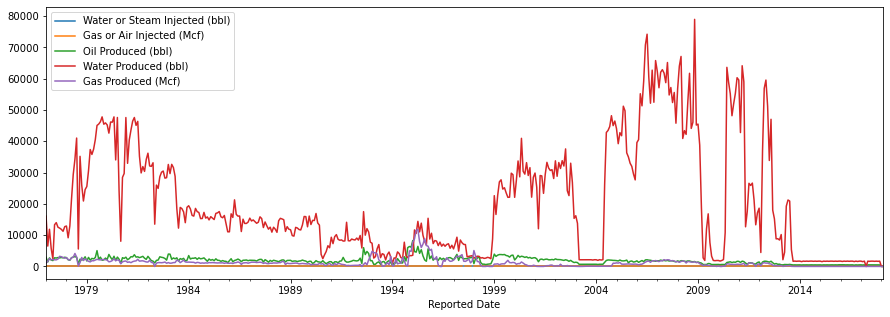

In [58]:
ts.plot(figsize=(15,5))

In [25]:
totaldf = totaldf.T
totaldf.index.name = "OID"
totaldf.to_csv(os.path.join(r"data\forfeature",f"wellts_total.csv"))

In [108]:
well_col = ['OBJECTID_1',
       'OBJECTID_12', 'NAME', 'FIELD_CODE', 'AREA_SQ_MI', 'AREA_ACRE',
       'PERIMETER', 'District', 'Shape_Leng', 'TOOLTIP', 'NLA_URL',
       'LatestUpda', 'DataSource', 'centerX', 'centerY', 'OID_']
of_info = well_oil[well_col].reset_index().drop("API__",axis=1)
of_info.index = of_info["OID_"]

In [111]:
of_info = of_info.drop_duplicates()

In [112]:
of_info.columns

Index(['OBJECTID_1', 'OBJECTID_12', 'NAME', 'FIELD_CODE', 'AREA_SQ_MI',
       'AREA_ACRE', 'PERIMETER', 'District', 'Shape_Leng', 'TOOLTIP',
       'NLA_URL', 'LatestUpda', 'DataSource', 'centerX', 'centerY', 'OID_'],
      dtype='object')

In [113]:
of_info.to_csv(os.path.join(r"data\forfeature","oil_info.csv"))
    #break